## Creating a Linear Regression Model With Numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error


In [5]:
#designing regression model
df = pd.read_csv('/Users/pelumioluwaabiola/Downloads/Predictive Modelling/Data set/data_demand.csv')
df['Constant'] = pd.Series(np.ones(25))
df

,Month,Demand,Advance demand,Constant
0,1,100,71,1.0
1,2,112,30,1.0
2,3,107,75,1.0
3,4,103,64,1.0
4,5,91,41,1.0
5,6,85,51,1.0
6,7,84,42,1.0
7,8,85,51,1.0
8,9,79,57,1.0
9,10,81,49,1.0


demand lead time: time lapse from when order is placed to when it is delivered

Demand lead time varies for each order from 2 weeks - several months

The sum of orders with a demand lead time that is more than one months is advanced demand



𝑌 : The vector of demand values from the second month to the last month (month 25)

• 𝑋 : The vector of demand values from the first month to the twenty-fourth month

• 𝐿 : The vector of advance demand values from the second
month to the last month (month 25)

E T E = (𝑌 − 𝑋𝛽)T (𝑌 − 𝑋𝛽)
subject to: 𝑋𝛽 ≥ 𝐿

ESTIMATION OF THE COEFFICIENTS

𝛽"#$ = (𝑋 T 𝑋)-1 (𝑋 T 𝑌 + 0.5𝑋 T 𝜆)

where 𝜆 = 2(𝑋(𝑋 T 𝑋) -1  𝑋 T )-1 𝐿 − 2𝑌


In [ ]:
# demand lead time: time lapse from when order is placed to when it is delivered


In [4]:
import numpy as np

def model(X,Y,lambda_,L):
  XT_X = np.dot(X.T,X)
  XT_Y = np.dot(X.T,Y)
  inv_XT_X = np.linalg.inv(XT_X)
  XT_lambda = 0.5* np.dot(X.T,lambda_)
  beta = inv_XT_X *(XT_Y + XT_lambda)
  return beta


def lambda_(X,Y,L):
  inv_XT_X = np.linalg.inv(np.dot(X.T,X))
  XT_inv = np.dot(X,inv_XT_X)
  XTX_inv = 2* np.linalg.inv(np.dot(XT_inv,X.T))
  lambda_ = (XTX_inv * L) - (2*Y)
  return lambda_

def regularisation(X,Y,beta):
  if np.dot(X,beta) >= L:
      X_B = np.dot(X,beta)
      Y_XB = Y - X_B
      beta = np.dot(Y_XB.T, Y_XB)
  else:
    beta = L
  return beta


#Define the variables
D1 = df.loc[0:23,'Demand'].values
A2 = df.loc[1:,'Advance demand'].values
Con = df.loc[1:,'Constant'].values
X = np.array(list(zip(Con,D1,A2)))
Y = np.array(df.loc[1:,'Demand'].values)
L = np.array(df.loc[1:,'Advance demand'].values)


In [71]:
df

,Month,Demand,Advance demand,Constant
0,1,100,71,1.0
1,2,112,30,1.0
2,3,107,75,1.0
3,4,103,64,1.0
4,5,91,41,1.0
5,6,85,51,1.0
6,7,84,42,1.0
7,8,85,51,1.0
8,9,79,57,1.0
9,10,81,49,1.0


In [72]:

#Define the variables
Y = df.iloc[1:, 1].values
L = df.iloc[1:, 2].values
x1 = df.iloc[0:24, 3].values
x2 = df.iloc[0:25, 1].values
x3 = df.iloc[1:, 2].values
pre_X = list(zip(x1,x2,x3))
X = np.array(pre_X)

print(Y)
print(L)



[112 107 103  91  85  84  85  79  81 134  86  99  89 111 114 118 163 193
 143 144 202 158 160 144]
[ 30  75  64  41  51  42  51  57  49 134  52  99  56  81  79  73 163 193
  99  91 202 105 101  96]


In [73]:
print(X)

[[  1. 100.  30.]
 [  1. 112.  75.]
 [  1. 107.  64.]
 [  1. 103.  41.]
 [  1.  91.  51.]
 [  1.  85.  42.]
 [  1.  84.  51.]
 [  1.  85.  57.]
 [  1.  79.  49.]
 [  1.  81. 134.]
 [  1. 134.  52.]
 [  1.  86.  99.]
 [  1.  99.  56.]
 [  1.  89.  81.]
 [  1. 111.  79.]
 [  1. 114.  73.]
 [  1. 118. 163.]
 [  1. 163. 193.]
 [  1. 193.  99.]
 [  1. 143.  91.]
 [  1. 144. 202.]
 [  1. 202. 105.]
 [  1. 158. 101.]
 [  1. 160.  96.]]


In [74]:
XT_X = np.dot(X.T,X)
print(XT_X)

[[2.40000e+01 2.84100e+03 2.08400e+03]
 [2.84100e+03 3.65877e+05 2.64291e+05]
 [2.08400e+03 2.64291e+05 2.29792e+05]]


In [75]:
inv_XT_X = np.linalg.inv(XT_X)
print(inv_XT_X)

[[ 5.22496431e-01 -3.74839679e-03 -4.27408373e-04]
 [-3.74839679e-03  4.30441531e-05 -1.55119558e-05]
 [-4.27408373e-04 -1.55119558e-05  2.60687463e-05]]


In [76]:
#for alpha
X_inv_XT_X = np.dot(X,inv_XT_X)
print(X_inv_XT_X)

[[ 1.34834500e-01  9.06598412e-05 -1.19654156e-03]
 [ 7.06203620e-02 -9.08483324e-05 -2.09591447e-04]
 [ 9.40638381e-02 -1.35437584e-04 -4.18787878e-04]
 [ 1.18887818e-01  4.91607868e-05 -9.56321220e-04]
 [ 1.59594496e-01 -6.22488608e-04 -5.09490287e-04]
 [ 1.85931552e-01 -7.41145925e-04 -6.51037270e-04]
 [ 1.85833273e-01 -9.23797680e-04 -4.00906597e-04]
 [ 1.79520426e-01 -9.73825262e-04 -2.60006074e-04]
 [ 2.05430074e-01 -1.10799453e-03 -3.75484310e-04]
 [ 1.61603569e-01 -2.34042247e-03  1.80933522e-03]
 [-2.01397491e-03  1.21289802e-03 -1.15043564e-03]
 [ 1.57820878e-01 -1.58228325e-03  8.19369316e-04]
 [ 1.27470279e-01 -3.55695163e-04 -5.03242202e-04]
 [ 1.54269038e-01 -1.17393559e-03  3.03596015e-04]
 [ 7.26591253e-02 -1.95940309e-04 -8.98045057e-05]
 [ 6.39783851e-02  2.62638854e-05 -2.92752851e-04]
 [ 1.05180444e-02 -1.19763552e-03  1.99138650e-03]
 [-1.70982063e-01  2.73992692e-04  2.07541088e-03]
 [-2.43257579e-01  3.02344113e-03 -8.40409954e-04]
 [-5.24184726e-02  9.95329121e-

In [77]:
#for alpha - adjust here
# (𝑋(𝑋T * 𝑋) -1 * 𝑋T )
XT_X_inv_XT_X = np.dot(X_inv_XT_X,X.T)
print(XT_X_inv_XT_X)

[[ 0.10800424  0.05524779  0.06795644  0.09511426  0.08206093  0.09228584
   0.08142631  0.07433772  0.08336609 -0.01815862  0.08476276  0.02417363
   0.0768035   0.04598336  0.05037096  0.05782219 -0.04950391 -0.08132047
   0.03387423  0.03891358 -0.09381188  0.02751092  0.02830806  0.03447208]
 [ 0.05524779  0.04472599  0.04748574  0.05266973  0.051664    0.05409541
   0.05229994  0.05095154  0.05317336  0.03517639  0.04754793  0.04205785
   0.04988926  0.04555795  0.04397847  0.04496348  0.02573685  0.01536093
   0.03233708  0.03855623  0.01520073  0.0302619   0.03509759  0.03596385]
 [ 0.06795644  0.04748574  0.05276959  0.06294346  0.06038084  0.06496255
   0.0613289   0.05868073  0.06284366  0.02697582  0.05413823  0.04095621
   0.0572034   0.04808807  0.04594602  0.04805244  0.00981978 -0.00883855
   0.02646438  0.03658657 -0.01003433  0.02273272  0.03036712  0.03219019]
 [ 0.09511426  0.05266973  0.06294346  0.08474221  0.07458907  0.08290099
   0.07424494  0.06855618  0.075911

In [78]:
#inverse of (𝑋(𝑋T * 𝑋) -1 * 𝑋T )
inv_XT_X_inv_XT_X = np.linalg.inv(XT_X_inv_XT_X)
print(inv_XT_X_inv_XT_X)

[[-2.15148425e+16  1.10957674e+17 -5.19904436e+16  3.70013214e+16
  -1.27696455e+17 -9.42400946e+16 -4.89916622e+16  4.11421816e+16
   4.70769241e+16  8.11392986e+15  5.97252328e+14 -3.04145202e+16
   4.97891868e+16  1.16270680e+16  5.22333183e+16  2.52166653e+16
  -7.02889346e+16  1.25668153e+16 -2.53390405e+16  2.04648436e+17
   9.57041147e+15 -4.86325482e+16 -9.70554310e+16  5.62278796e+15]
 [-1.99981832e+16 -1.67541861e+16  6.05406345e+15  1.64220962e+16
  -1.32532676e+15 -3.02447121e+16 -3.14428831e+16  3.02393336e+16
   1.61588442e+16  1.22340427e+16  4.37230207e+15  1.09565012e+16
  -2.48192610e+14  3.76919588e+15 -7.75749562e+15  1.84381499e+16
  -1.71186274e+16  1.75632257e+14  8.66120098e+15  1.35783879e+16
  -3.83048700e+15 -4.32290490e+15 -1.87141309e+16  1.06973794e+16]
 [-5.49026070e+15 -4.11739237e+16  4.66169797e+16 -2.74052137e+16
   6.04265555e+16  2.95717704e+16  4.42077871e+16 -2.69938820e+16
  -2.25115377e+16 -2.96190614e+16 -3.88309570e+15  3.36042688e+16
   1.762

In [79]:
#2 * inverse of (𝑋(𝑋T * 𝑋) -1 * 𝑋T )
two_inv_XT_X_inv_XT_X = np.dot(2,inv_XT_X_inv_XT_X)
print(two_inv_XT_X_inv_XT_X)

[[-4.30296851e+16  2.21915347e+17 -1.03980887e+17  7.40026429e+16
  -2.55392910e+17 -1.88480189e+17 -9.79833244e+16  8.22843632e+16
   9.41538481e+16  1.62278597e+16  1.19450466e+15 -6.08290403e+16
   9.95783736e+16  2.32541360e+16  1.04466637e+17  5.04333306e+16
  -1.40577869e+17  2.51336306e+16 -5.06780811e+16  4.09296873e+17
   1.91408229e+16 -9.72650963e+16 -1.94110862e+17  1.12455759e+16]
 [-3.99963664e+16 -3.35083723e+16  1.21081269e+16  3.28441924e+16
  -2.65065352e+15 -6.04894242e+16 -6.28857661e+16  6.04786671e+16
   3.23176885e+16  2.44680854e+16  8.74460414e+15  2.19130024e+16
  -4.96385220e+14  7.53839175e+15 -1.55149912e+16  3.68762998e+16
  -3.42372548e+16  3.51264513e+14  1.73224020e+16  2.71567757e+16
  -7.66097399e+15 -8.64580980e+15 -3.74282618e+16  2.13947589e+16]
 [-1.09805214e+16 -8.23478475e+16  9.32339594e+16 -5.48104275e+16
   1.20853111e+17  5.91435408e+16  8.84155741e+16 -5.39877641e+16
  -4.50230755e+16 -5.92381227e+16 -7.76619140e+15  6.72085375e+16
   3.525

In [80]:
#2 * inverse of (𝑋(𝑋T * 𝑋) -1 * 𝑋T ) times L
L_two_inv_XT_X_inv_XT_X = np.dot(two_inv_XT_X_inv_XT_X,L)
print(L_two_inv_XT_X_inv_XT_X)

[ -40960.   94208. -184320.  165888.   28672.    8192.   -6144.       0.
  -36864.    1024.  -10240.    9216.   -8192.  -22528.   13312.    3840.
   18432.   -1024.    1536.   -4480.    -256.       0.   -6144.   -3584.]


In [81]:
#2Y
two_Y = np.dot(2,Y)
print(two_Y)


[224 214 206 182 170 168 170 158 162 268 172 198 178 222 228 236 326 386
 286 288 404 316 320 288]


In [82]:
#2 * inverse of (𝑋(𝑋T * 𝑋) -1 * 𝑋T ) times L minu 2Y
alpha = L_two_inv_XT_X_inv_XT_X - two_Y
print(alpha)

[-4.11840e+04  9.39940e+04 -1.84526e+05  1.65706e+05  2.85020e+04
  8.02400e+03 -6.31400e+03 -1.58000e+02 -3.70260e+04  7.56000e+02
 -1.04120e+04  9.01800e+03 -8.37000e+03 -2.27500e+04  1.30840e+04
  3.60400e+03  1.81060e+04 -1.41000e+03  1.25000e+03 -4.76800e+03
 -6.60000e+02 -3.16000e+02 -6.46400e+03 -3.87200e+03]


In [83]:
XT_Y = np.dot(X.T,Y)
print(XT_Y)

[  2885. 362603. 284659.]


In [84]:
point_five_XT = np.dot(0.5,X.T)
print(point_five_XT)

[[  0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5
    0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5]
 [ 50.   56.   53.5  51.5  45.5  42.5  42.   42.5  39.5  40.5  67.   43.
   49.5  44.5  55.5  57.   59.   81.5  96.5  71.5  72.  101.   79.   80. ]
 [ 15.   37.5  32.   20.5  25.5  21.   25.5  28.5  24.5  67.   26.   49.5
   28.   40.5  39.5  36.5  81.5  96.5  49.5  45.5 101.   52.5  50.5  48. ]]


In [85]:
#0.5𝑋T * 𝜆
alpha_point_five_XT = np.dot(point_five_XT,alpha)
print(alpha_point_five_XT)

[  6907. 828501. 529741.]


In [86]:
#0.5𝑋T * 𝜆 + XT_Y
al_point_five_XT_plusY = XT_Y + alpha_point_five_XT
print(al_point_five_XT_plusY)

[   9792. 1191104.  814400.]


In [87]:
beta = np.dot(inv_XT_X,al_point_five_XT_plusY)
print(beta)


[303.47325726   1.93282472  -1.43114837]


In [88]:
y_hat = np.dot(X,beta)
print(y_hat)

[453.82127802 412.6134981  418.69200655 443.87712013 406.37173985
 407.65512684 392.84196682 386.18790134 386.04013997 268.25817819
 488.05205434 328.01249463 414.67859575 359.57163939 404.95607992
 419.34144427 298.26939009 342.31205137 534.82473942 449.63269048
 292.70804643 543.63327168 464.31357757 475.33496884]


In [122]:
#ols beta
ols_XT_X = np.dot(X.T,X)
inv_ols_XT_X = np.linalg.inv(ols_XT_X)
inv_ols_XT_X

array([[ 5.22496431e-01, -3.74839679e-03, -4.27408373e-04],
       [-3.74839679e-03,  4.30441531e-05, -1.55119558e-05],
       [-4.27408373e-04, -1.55119558e-05,  2.60687463e-05]])

In [123]:
#computing ols beta contd
ols_XT_Y = np.dot(X.T,Y)
beta_ols = np.dot(inv_ols_XT_X, ols_XT_Y)
beta_ols

array([26.55664032,  0.37819647,  0.5629484 ])

In [124]:
#predict with ols beta
y_ols = np.dot(X,beta_ols)
y_ols

array([ 81.26473915, 111.13577478, 103.05236003,  88.59176095,
        89.68288734,  82.34717293,  87.03551206,  90.79139893,
        84.01863292, 132.62563988, 106.50828387, 114.81342821,
        95.52320109, 105.81494641, 113.00937191, 110.76627091,
       162.94441281, 196.85170589, 155.28045031, 131.8670397 ,
       194.7325086 , 162.06190892, 143.16947072, 141.11112166])

In [66]:
#define the loss function with sum of squared residuals with L2 regularization
def ssr_reg(alpha,y_pred,Y):
    error = Y - y_pred
    ssr = np.dot(error.T,error)
    L2_reg = alpha * np.dot(beta_ols.T,beta_ols)
    ssr_reg = ssr + L2_reg
    return ssr_reg

In [125]:
beta_test = beta_ols.copy()
beta_test

array([26.55664032,  0.37819647,  0.5629484 ])

In [128]:
# Training with ols beta Implement gradient descent to minimize the loss function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    n = len(y)
    losses = []

    for iteration in range(num_iterations):
        y_pred = np.dot(X,beta_ols)
        gradient = (1 / n) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient

        loss = ssr_reg(alpha,y_pred,Y)
        losses.append(loss)

    return theta, losses


# Initialize model parameters (theta) with random values
theta = beta_test

# Set hyperparameters
learning_rate = 0.1
num_iterations = 20

# Step 5: Train the model
theta, training_losses = gradient_descent(X, Y, theta, learning_rate, num_iterations)

# Print the learned model parameters and the final loss
print("Learned model parameters (theta):")
print(theta)

final_loss = training_losses[-1]
print("Final loss (rss):", final_loss)


Learned model parameters (theta):
[26.55664032  0.37819647  0.5629484 ]
Final loss (rss): [-2.90615566e+07  6.63355976e+07 -1.30220169e+08  1.16943838e+08
  2.01169050e+07  5.66527146e+06 -4.45327148e+06 -1.08889394e+05
 -2.61271933e+07  5.36134197e+05 -7.34529191e+06  6.36675226e+06
 -5.90422170e+06 -1.60524047e+07  9.23618981e+06  2.54601077e+06
  1.27802910e+07 -9.92444685e+05  8.84757451e+05 -3.36223595e+06
 -4.63158368e+05 -2.20392378e+05 -4.55912874e+06 -2.72991523e+06]


In [129]:
y_model = np.dot(X,theta)
y_model

array([ 81.26473916, 111.13577479, 103.05236005,  88.59176097,
        89.68288735,  82.34717294,  87.03551207,  90.79139895,
        84.01863293, 132.6256399 , 106.50828389, 114.81342823,
        95.5232011 , 105.81494643, 113.00937193, 110.76627093,
       162.94441284, 196.85170592, 155.28045033, 131.86703972,
       194.73250863, 162.06190895, 143.16947074, 141.11112168])

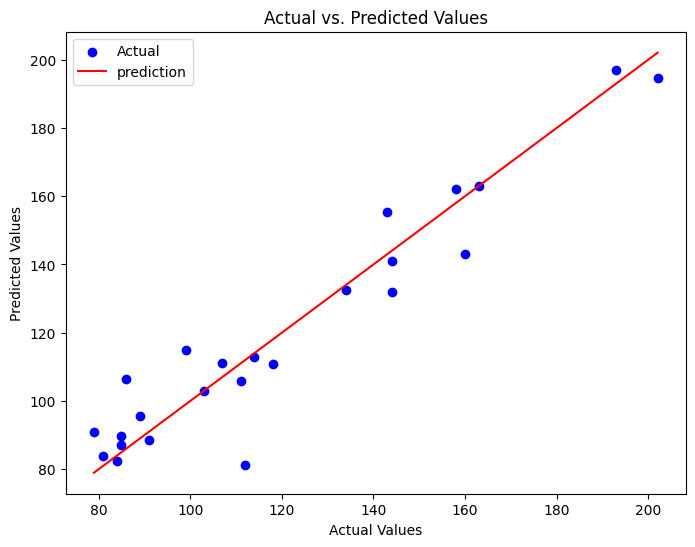

In [104]:
#plot your ols prediction
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_model, color='blue', label='Actual')

# Add a line for to show the relationship (ideal prediction)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], linestyle='-', color='red', label='prediction')

# Customize the plot
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Display the plot
plt.show()

In [105]:
y_model
error = Y - y_model
print(error)

[ 30.73526081  -4.13577484  -0.0523601    2.40823899  -4.68288739
   1.65282703  -2.03551211 -11.79139898  -3.01863297   1.37436004
 -20.50828394 -15.81342828  -6.52320114   5.18505353   0.99062802
   7.23372902   0.05558709  -3.85170601 -12.28045041  12.13296022
   7.26749128  -4.06190903  16.83052919   2.88887825]


In [59]:
#calculate error
error = Y - y_ols
print(error)

[ 30.73526085  -4.13577478  -0.05236003   2.40823905  -4.68288734
   1.65282707  -2.03551206 -11.79139893  -3.01863292   1.37436012
 -20.50828387 -15.81342821  -6.52320109   5.18505359   0.99062809
   7.23372909   0.05558719  -3.85170589 -12.28045031  12.1329603
   7.2674914   -4.06190892  16.83052928   2.88887834]


In [60]:
y_model = np.dot(X,beta_ols) + error
y_model

array([112., 107., 103.,  91.,  85.,  84.,  85.,  79.,  81., 134.,  86.,
        99.,  89., 111., 114., 118., 163., 193., 143., 144., 202., 158.,
       160., 144.])

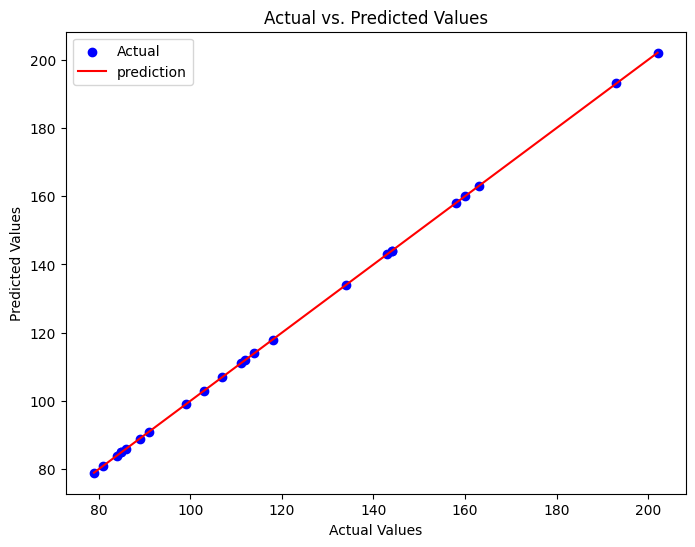

In [62]:
#plot your ols prediction
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_model, color='blue', label='Actual')

# Add a line for to show the relationship (ideal prediction)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], linestyle='-', color='red', label='prediction')

# Customize the plot
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Display the plot
plt.show()

In [107]:
# Training with reg beta Implement gradient descent to minimize the loss function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    n = len(y)
    losses = []

    for iteration in range(num_iterations):
        y_pred = np.dot(X,beta_ols)
        gradient = (1 / n) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient

        loss = ssr_reg(alpha,y_pred,Y)
        losses.append(loss)

    return theta, losses


# Initialize model parameters (theta) with random values
theta = beta

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Step 5: Train the model
theta, training_losses = gradient_descent(X, Y, theta, learning_rate, num_iterations)

# Print the learned model parameters and the final loss
print("Learned model parameters (theta):")
print(theta)

final_loss = training_losses[-1]
print("Final loss (rss):", final_loss)

Learned model parameters (theta):
[303.47325726   1.93282472  -1.43114836]
Final loss (rss): [-2.90615566e+07  6.63355976e+07 -1.30220169e+08  1.16943838e+08
  2.01169050e+07  5.66527146e+06 -4.45327148e+06 -1.08889394e+05
 -2.61271933e+07  5.36134197e+05 -7.34529191e+06  6.36675226e+06
 -5.90422170e+06 -1.60524047e+07  9.23618981e+06  2.54601077e+06
  1.27802910e+07 -9.92444685e+05  8.84757451e+05 -3.36223595e+06
 -4.63158368e+05 -2.20392378e+05 -4.55912874e+06 -2.72991523e+06]


In [108]:
y_model = np.dot(X,theta)
y_model

array([453.82127845, 412.6134987 , 418.6920071 , 443.8771206 ,
       406.3717403 , 407.65512726, 392.84196725, 386.18790179,
       386.04014038, 268.25817884, 488.05205495, 328.0124952 ,
       414.67859625, 359.57163993, 404.95608052, 419.34144487,
       298.26939095, 342.31205247, 534.82474037, 449.63269123,
       292.70804749, 543.63327267, 464.3135784 , 475.33496966])

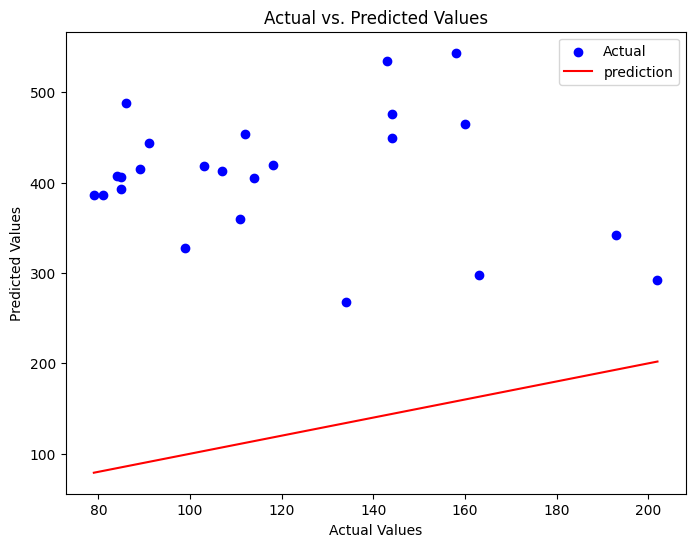

In [109]:
#plot your reg prediction
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_model, color='blue', label='Actual')

# Add a line for to show the relationship (ideal prediction)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], linestyle='-', color='red', label='prediction')

# Customize the plot
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Display the plot
plt.show()